In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import pandas as pd

In [3]:
files = [f for f in os.listdir('.') if os.path.isfile(f)]
files

['atlanta_9-24-2016_9-30-2017.csv',
 'baltimore_9-24-2016_9-30-2017.csv',
 'boston_9-24-2016_9-30-2017.csv',
 'chicago_9-24-2016_9-30-2017.csv',
 'columbia_9-24-2016_9-30-2017.csv',
 'dallas_9-24-2016_9-30-2017.csv',
 'detroit_9-24-2016_9-30-2017.csv',
 'los-angeles_9-24-2016_9-30-2017.csv',
 'miami_9-24-2016_9-30-2017.csv',
 'new-york_9-24-2016_9-30-2017.csv',
 'philadelphia_9-24-2016_9-30-2017.csv',
 'pumpkin.ipynb',
 'san-fransisco_9-24-2016_9-30-2017.csv',
 'st-louis_9-24-2016_9-30-2017.csv']

In [4]:
frame = pd.DataFrame()
list_ = []

for file in files:
    if file.split(".")[-1] == 'csv':
        df = pd.read_csv(file,index_col=None, header=0)
        list_.append(df)
frame = pd.concat(list_)
frame.head()

,Appearance,City Name,Color,Comments,Commodity Name,Condition,Crop,Date,Environment,Grade,...,Package,Price Comment,Quality,Repack,Storage,Sub Variety,Trans Mode,Type,Unit of Sale,Variety
0,NaN,ATLANTA,NaN,NaN,PUMPKINS,NaN,NaN,09/24/2016,NaN,NaN,...,24 inch bins,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,HOWDEN TYPE
1,NaN,ATLANTA,NaN,NaN,PUMPKINS,NaN,NaN,09/24/2016,NaN,NaN,...,24 inch bins,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,HOWDEN TYPE
2,NaN,ATLANTA,NaN,NaN,PUMPKINS,NaN,NaN,09/24/2016,NaN,NaN,...,24 inch bins,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,HOWDEN TYPE
3,NaN,ATLANTA,NaN,NaN,PUMPKINS,NaN,NaN,09/24/2016,NaN,NaN,...,24 inch bins,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,HOWDEN TYPE
4,NaN,ATLANTA,NaN,NaN,PUMPKINS,NaN,NaN,10/01/2016,NaN,NaN,...,24 inch bins,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,HOWDEN TYPE


# Where Pumpkin Price High?

In [5]:
Where_pumpkin_price_high = []
Where_pumpkin_price_high = frame[['City Name','High Price']]

#Where_pumpkin_price_high.plot.scatter(x='City Name', y='High Price')

In [6]:
Where_pumpkin = pd.get_dummies(Where_pumpkin_price_high,prefix=['City Name'])

#df.loc[df['Value'].idxmax()]
#Where_pumpkin_price_high.loc[Where_pumpkin_price_high['High Price'].idxmax()]

#df[df['Value']==df['Value'].max()]
Where_pumpkin_price_high[Where_pumpkin_price_high['High Price']==Where_pumpkin_price_high['High Price'].max()]


,City Name,High Price
44,SAN FRANCISCO,480.0


# How Pumpkin Size Related to Price

In [7]:
How_Size_Price = frame[['Low Price','High Price','Item Size']]
How_Size_Price.head()

,Low Price,High Price,Item Size
0,140.0,154.75,jbo
1,145.0,154.75,xlge
2,150.0,154.75,med-lge
3,150.0,150.00,sml
4,140.0,154.75,jbo


In [8]:
How_Size_Price = How_Size_Price.dropna()

In [9]:
# df['Volume'] = df.Length*df.Height*df.Depth
How_Size_Price['Avg Price'] = (How_Size_Price['High Price'] + How_Size_Price['Low Price'])/2.0
How_Size_Price.head()

,Low Price,High Price,Item Size,Avg Price
0,140.0,154.75,jbo,147.375
1,145.0,154.75,xlge,149.875
2,150.0,154.75,med-lge,152.375
3,150.0,150.00,sml,150.000
4,140.0,154.75,jbo,147.375


In [10]:
How_Size_Price = How_Size_Price[['Avg Price','Item Size']]
How_Size_Price.head()

,Avg Price,Item Size
0,147.375,jbo
1,149.875,xlge
2,152.375,med-lge
3,150.000,sml
4,147.375,jbo


dict_keys(['exjbo', 'jbo', 'lge', 'med', 'med-lge', 'sml', 'xlge'])


[['exjbo', 153.23529411764707],
 ['jbo', 161.6533203125],
 ['lge', 154.72542372881355],
 ['med', 123.98071216617211],
 ['med-lge', 171.78214285714282],
 ['sml', 87.99104683195591],
 ['xlge', 197.69085365853658]]

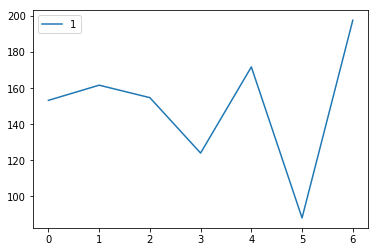

In [11]:
#Size_sml = How_Size_Price[How_Size_Price['Item Size']=='sml']
#Size_sml['Avg Price'].mean()
l = []
m = []
Size_sml = How_Size_Price.groupby("Item Size")
l = list(Size_sml.groups.keys())
print(Size_sml.groups.keys())
for itm in l:
    m.append([itm,Size_sml.get_group(itm).mean()[-1]])
pd.DataFrame(m).plot() 
m
#print(Size_sml.get_group('sml').mean())
#for name,group in Size_sml:
 #   print(group)

# Which variety most and least expensive

In [12]:
Most_Least = frame[['Low Price','High Price','Variety']]
Most_Least.head()

,Low Price,High Price,Variety
0,140.0,154.75,HOWDEN TYPE
1,145.0,154.75,HOWDEN TYPE
2,150.0,154.75,HOWDEN TYPE
3,150.0,150.00,HOWDEN TYPE
4,140.0,154.75,HOWDEN TYPE


In [13]:
Most_Least = Most_Least.dropna()
Most_Least.head()

,Low Price,High Price,Variety
0,140.0,154.75,HOWDEN TYPE
1,145.0,154.75,HOWDEN TYPE
2,150.0,154.75,HOWDEN TYPE
3,150.0,150.00,HOWDEN TYPE
4,140.0,154.75,HOWDEN TYPE


In [14]:
Most_Least['Avg Price'] =(Most_Least['High Price'] + Most_Least['Low Price'])/2.0
Most_Least = Most_Least[['Avg Price','Variety']]
Most_Least.head()

,Avg Price,Variety
0,147.375,HOWDEN TYPE
1,149.875,HOWDEN TYPE
2,152.375,HOWDEN TYPE
3,150.000,HOWDEN TYPE
4,147.375,HOWDEN TYPE


In [18]:
M = []
Most = Most_Least.groupby("Variety")
j = list(Most.groups.keys())
j
#print(Most.groups.keys())
for itmM in j:
    #print(Most.get_group(itmM).max()[0])
    M.append([itmM,Most.get_group(itmM).max()[0]])
M = pd.DataFrame(M)
M[M[1]==M[1].max()]

,0,1
9,PIE TYPE,480.0


In [19]:
N = []
Least = Most_Least.groupby("Variety")
k = list(Least.groups.keys())
k
#print(Most.groups.keys())
for itmN in k:
    #print(Most.get_group(itmM).max()[0])
    N.append([itmN,Least.get_group(itmN).min()[0]])
N = pd.DataFrame(N)
N[N[1]==N[1].min()]

,0,1
3,FAIRYTALE,0.24
